# FBXO11
[Intellectual developmental disorder with dysmorphic facies and behavioral abnormalities (IDDFBA)](https://omim.org/entry/618089) is caused by heterozygous mutation in the [FBXO11 gene](https://omim.org/entry/607871). Almost all  affected individuals presented with mild to severe intellectual disability and global developmental delay. F-box proteins, such as FBXO11, contain an approximately 40-amino acid motif, the F box, that binds SKP1. Reported pathogenic variants include pathogenic variants include likely gene-disrupting (LGD) variants, missense variants, deletion of partial exons, and CNVs. Published literature has not reported a genotype-phenotype correlation to date. The following articles were consulted:


- [Gregor A, et al. (2018) De Novo Variants in the F-Box Protein FBXO11 in 20 Individuals with a Variable Neurodevelopmental Disorder. Am J Hum Genet](https://pubmed.ncbi.nlm.nih.gov/30057029/)
- [Jansen S, et al. (2019) De novo variants in FBXO11 cause a syndromic form of intellectual disability with behavioral problems and dysmorphisms. Eur J Hum Genet. 2019](https://pubmed.ncbi.nlm.nih.gov/30679813/)
- [Pan X, et al (2024) FBXO11 variants are associated with intellectual disability and variable clinical manifestation in Chinese affected individuals. J Hum Genet.](https://pubmed.ncbi.nlm.nih.gov/38740982/)

Our analysis of 56 individuals failed to show a significant genotype phenotype correlation, in accordance with current literature.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### FBXO11
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for FBXO11.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = "FBXO11"
mane_tx_id = 'NM_001190274.2'
mane_protein_id = 'NP_001177203.1' # F-box only protein 11 isoform 4
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release="0.1.24") as ps:
  phenopackets = list(ps.iter_cohort_phenopackets(gene_symbol))
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
   phenopackets=phenopackets,
   cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 56/56 [00:06<00:00,  8.92 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
54,Global developmental delay
32,Intellectual disability
25,Delayed speech and language development
22,Hypotonia
18,Delayed ability to walk
16,Thin upper lip vermilion
14,Autistic behavior
13,Overweight
13,Strabismus
12,Seizure


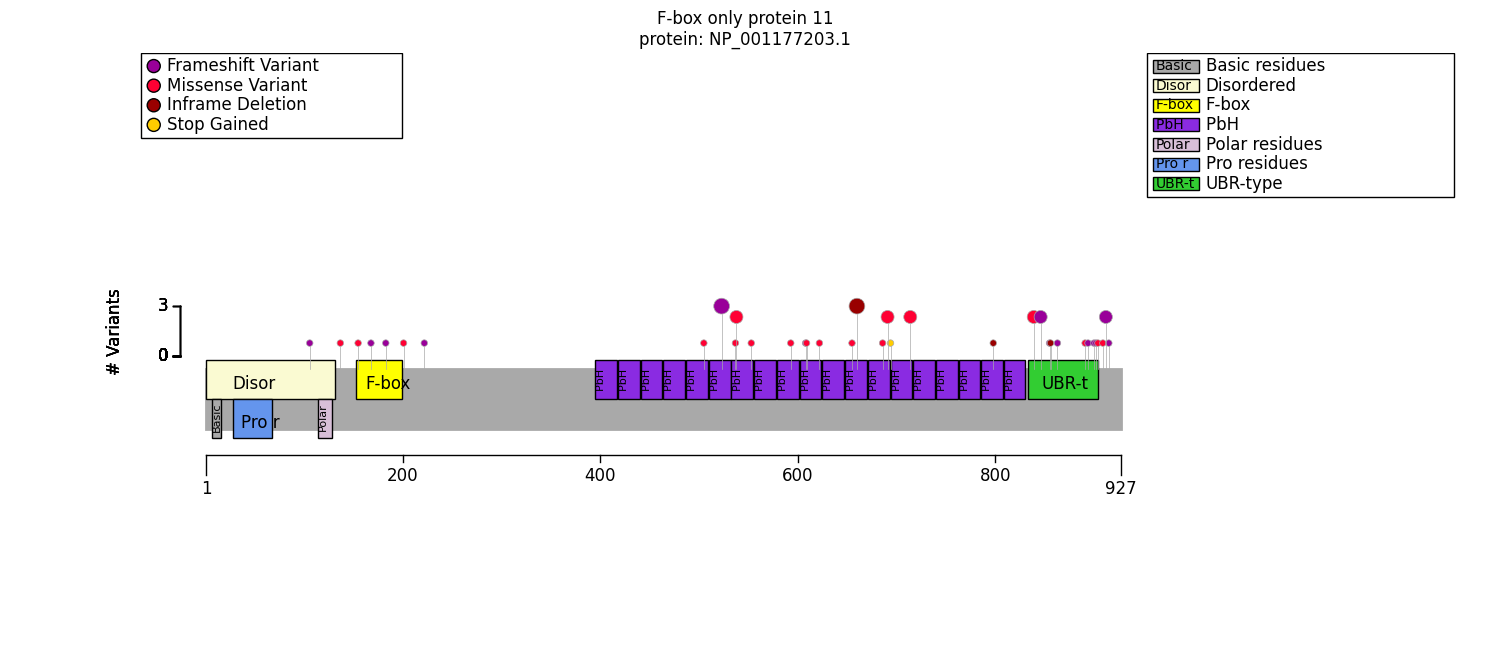

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

fbxo11_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
fbxo11_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
1,Disordered,Region,2 - 132,p.Leu107AlafsTer45
0,Basic residues,Compositional bias,8 - 16,
0,Pro residues,Compositional bias,29 - 68,
0,Polar residues,Compositional bias,115 - 129,
3,F-box,Domain,154 - 199,p.Gln156Arg; p.Ser169LeufsTer9; p.Lys184AsnfsTer27
0,PbH1 1,Repeat,396 - 417,
0,PbH1 2,Repeat,419 - 440,
0,PbH1 3,Repeat,442 - 463,
0,PbH1 4,Repeat,465 - 486,
1,PbH1 5,Repeat,488 - 509,p.Tyr506Cys


# Genotype Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf = monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label='Missense',
    b_label='Other'
)
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_viewer.process(missense_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,7
"Skipping ""general"" level terms",71
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),219


In [9]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense,Other,Corrected p values,p values
Overweight [HP:0025502],1/12 (8%),12/22 (55%),0.853603,0.010745
Seizure [HP:0001250],8/19 (42%),4/33 (12%),0.853603,0.019396
Hypotonia [HP:0001252],13/17 (76%),9/23 (39%),0.853603,0.026675
Anteverted nares [HP:0000463],3/20 (15%),0/34 (0%),1.000000,0.045960
Narrow palpebral fissure [HP:0045025],2/10 (20%),0/22 (0%),1.000000,0.090726
...,...,...,...,...
Abnormal communication [HP:0034434],8/8 (100%),17/17 (100%),1.000000,1.000000
Abnormal oral cavity morphology [HP:0000163],8/8 (100%),18/18 (100%),1.000000,1.000000
Abnormality of the mouth [HP:0000153],8/8 (100%),18/18 (100%),1.000000,1.000000
Abnormal eyelid morphology [HP:0000492],9/9 (100%),18/18 (100%),1.000000,1.000000


In [10]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Epicanthus [HP:0000286],1/21 (5%),7/33 (21%),1.0,0.130989
Microcephaly [HP:0000252],0/20 (0%),5/31 (16%),1.0,0.142870
Aggressive behavior [HP:0000718],2/6 (33%),1/18 (6%),1.0,0.143281
Sleep onset insomnia [HP:0031354],4/16 (25%),2/31 (6%),1.0,0.160744
Overweight [HP:0025502],7/13 (54%),6/21 (29%),1.0,0.167588
...,...,...,...,...
Abnormal lip morphology [HP:0000159],6/6 (100%),19/19 (100%),1.0,1.000000
Abnormal eyelid morphology [HP:0000492],6/6 (100%),21/21 (100%),1.0,1.000000
Abnormal ocular adnexa morphology [HP:0030669],6/6 (100%),21/21 (100%),1.0,1.000000
Abnormal oral cavity morphology [HP:0000163],7/7 (100%),19/19 (100%),1.0,1.000000


# Summary
In the published literature, no genotype-phenotype correlations were established (PMID:34505148). 

In [11]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_mono(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=mf_result,
    )
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [12]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
Missense,Other,96,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,96,0


In [13]:
summarizer.process_latex(report=report, protein_fig=fbxo11_fig)

Figure saved to ../../supplement/img/FBXO11_protein_diagram-draft.pdf
Output to ../../supplement/tex/FBXO11_summary_draft.tex
